# Asignment 7

## 1

## A

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

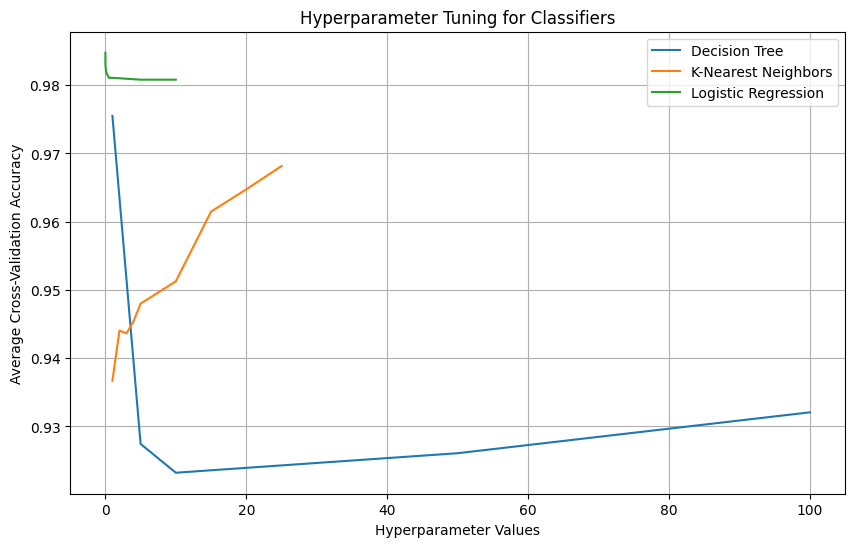

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

filepath = "../Data/train_office.csv"

# Load the data
data = pd.read_csv(filepath)

# Drop the 'date' column from features
X = data.drop(['Occupancy', 'date'], axis=1)
y = data['Occupancy']

# Initialize classifiers
classifiers = {
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression()
}

# Define hyperparameter grids
param_grids = {
    'Decision Tree': {'max_depth': [1, 5, 10, 50, 100]},
    'K-Nearest Neighbors': {'n_neighbors': [1, 2, 3, 4, 5, 10, 15, 20, 25]},
    'Logistic Regression': {'C': [0.001, 0.01, 0.1, 0.5, 1, 5, 10]}
}

# Perform 5-fold cross-validation and calculate average accuracy
avg_accuracies = {}

for clf_name, clf in classifiers.items():
    param_grid = param_grids[clf_name]
    scores = []
    
    for param_value in param_grid.values():
        param_name = list(param_grid.keys())[0]
        for val in param_value:
            param_scores = cross_val_score(clf.set_params(**{param_name: val}), X, y, cv=5)
            scores.append(np.mean(param_scores))
    
    avg_accuracies[clf_name] = scores

# Plotting
plt.figure(figsize=(10, 6))

for clf_name, scores in avg_accuracies.items():
    param_values = list(param_grids[clf_name].values())[0]
    plt.plot(param_values, scores, label=clf_name)

plt.xlabel('Hyperparameter Values')
plt.ylabel('Average Cross-Validation Accuracy')
plt.legend()
plt.title('Hyperparameter Tuning for Classifiers')
plt.grid(True)
plt.show()